#  Retail Store Product Sales Analysis


##  Project Overview
This project analyzes retail store product sales data to predict **footfall** (customer traffic) using various machine learning models. The dataset contains features like discount, promotion intensity, ad spend, competitor prices, and customer sentiment.


##  1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

##  2. Load and Explore Data

In [2]:
df = pd.read_csv('RetailStoreProductSalesDataset.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\n Shape: {df.shape}")
print(f" Columns: {df.columns.tolist()}\n")

df.head()

DATASET OVERVIEW

 Shape: (15000, 11)
 Columns: ['Unnamed: 0', 'price', 'discount', 'promotion_intensity', 'footfall', 'ad_spend', 'competitor_price', 'stock_level', 'weather_index', 'customer_sentiment', 'return_rate']



,Unnamed: 0,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
0,0,45.197454,5.514259,4.062653,277.017484,2559.073870,44.255411,1176.981397,7.442194,1.021762,0.067388
1,1,49.327512,6.572035,4.964657,250.760714,2536.417155,50.331704,1219.359497,6.759510,0.975142,0.082719
2,2,47.328457,6.972713,4.363191,263.130478,2552.952356,49.285996,1263.822738,5.941689,0.871567,0.061600
3,3,50.964538,4.808234,3.577988,297.603918,2605.398826,46.839936,1182.435378,8.517014,1.071300,0.052215
4,4,44.530213,8.180216,4.966638,208.931691,2432.485683,45.336500,1178.513263,8.422473,1.068515,0.057975


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   price                15000 non-null  float64
 2   discount             15000 non-null  float64
 3   promotion_intensity  15000 non-null  float64
 4   footfall             15000 non-null  float64
 5   ad_spend             15000 non-null  float64
 6   competitor_price     15000 non-null  float64
 7   stock_level          15000 non-null  float64
 8   weather_index        15000 non-null  float64
 9   customer_sentiment   15000 non-null  float64
 10  return_rate          15000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [4]:

df.drop('Unnamed: 0', inplace=True, axis=1)


In [5]:
df.describe()


,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49.956732,6.837203,4.136523,239.445517,2504.998502,50.000493,1193.310305,7.598516,0.965801,0.063421
std,11.686149,3.733815,1.435314,46.325019,89.961407,12.333737,28.146760,2.032408,0.130758,0.017703
min,20.212604,0.000000,-1.049689,70.152377,2097.020336,16.656974,1083.677929,1.889509,-0.220674,0.000000
25%,41.289515,3.861480,3.288099,215.277581,2454.732256,40.924934,1174.319261,6.003253,0.897901,0.051708
50%,49.859890,6.813337,4.420697,251.341265,2518.736486,49.996544,1193.420041,7.602752,0.977009,0.063346
75%,58.659467,9.713206,5.227893,272.570188,2568.142658,58.859576,1212.020553,9.202837,1.049154,0.074673
max,79.248053,18.757707,6.966653,348.795219,2764.819228,85.804626,1301.090400,13.451735,1.347314,0.185994


##  3. Exploratory Data Analysis (EDA)

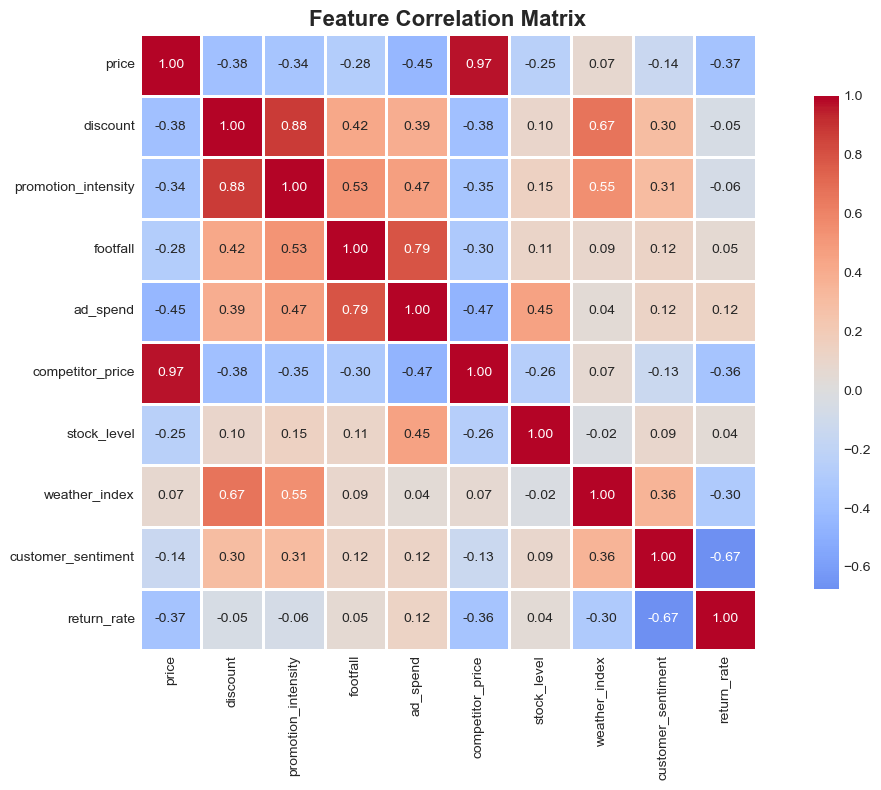

In [6]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:

print("\n Correlations with Footfall:")
print(corr['footfall'].sort_values(ascending=False))


 Correlations with Footfall:
footfall               1.000000
ad_spend               0.789288
promotion_intensity    0.528194
discount               0.419825
customer_sentiment     0.121238
stock_level            0.114077
weather_index          0.090699
return_rate            0.052372
price                 -0.280646
competitor_price      -0.304304
Name: footfall, dtype: float64


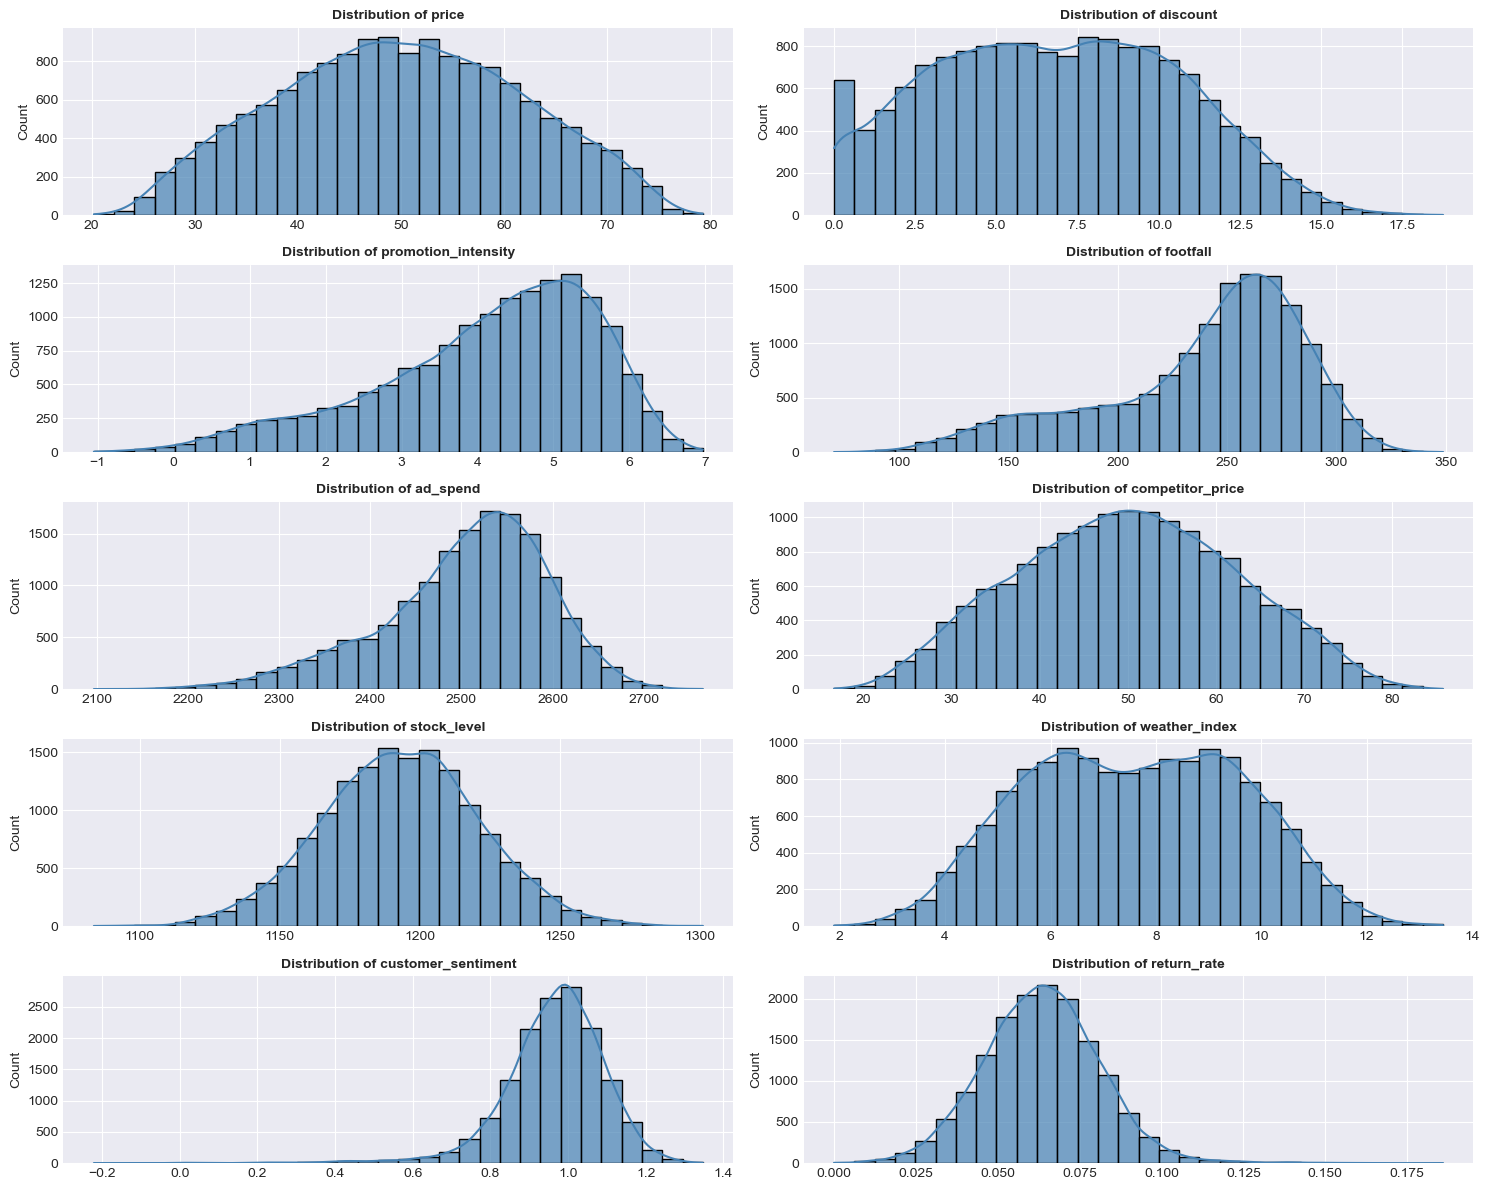

In [8]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 2, i) 
    sns.histplot(df[col], kde=True, bins=30, color='steelblue', alpha=0.7) 
    plt.title(f"Distribution of {col}", fontsize=10, fontweight='bold')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [9]:
print("\n" + "=" * 60)
print("UNIQUE VALUES ANALYSIS")
print("=" * 60)

for col in df.columns:
    print(f"\n {col}:")
    print(f"   Unique values: {len(df[col].unique())}")
    if len(df[col].unique()) <= 10:
        print(f"   Values: {sorted(df[col].unique())}")


UNIQUE VALUES ANALYSIS

 price:
   Unique values: 15000

 discount:
   Unique values: 14625

 promotion_intensity:
   Unique values: 15000

 footfall:
   Unique values: 15000

 ad_spend:
   Unique values: 15000

 competitor_price:
   Unique values: 15000

 stock_level:
   Unique values: 15000

 weather_index:
   Unique values: 15000

 customer_sentiment:
   Unique values: 15000

 return_rate:
   Unique values: 14999


##  4. Data Cleaning & Preprocessing

In [10]:
cols_to_cap = ['discount', 'promotion_intensity', 'footfall', 'ad_spend', 
               'competitor_price', 'stock_level', 'return_rate', 'customer_sentiment']

print("\n Outlier Treatment Summary:")
print("-" * 60)

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    
    print(f"{col:25} | Outliers removed: {outliers_before:4}")


 Outlier Treatment Summary:
------------------------------------------------------------
discount                  | Outliers removed:    1
promotion_intensity       | Outliers removed:  168
footfall                  | Outliers removed:  337
ad_spend                  | Outliers removed:  287
competitor_price          | Outliers removed:    1
stock_level               | Outliers removed:  101
return_rate               | Outliers removed:  187
customer_sentiment        | Outliers removed:  372


##  5. Feature Engineering

In [11]:
df['price_discount_ratio'] = df['competitor_price'] * df['discount']
df['promotion_adspend'] = df['promotion_intensity'] * df['ad_spend']
df['stock_return_ratio'] = df['stock_level'] / (df['return_rate'] + 1)

df['discount_squared'] = df['discount'] ** 2
df['sentiment_squared'] = df['customer_sentiment'] ** 2

print("\n New Features Created:")
print(df[['price_discount_ratio', 'promotion_adspend', 'stock_return_ratio', 
          'discount_squared', 'sentiment_squared']].head())


 New Features Created:
   price_discount_ratio  promotion_adspend  stock_return_ratio  \
0            244.035817       10396.629471         1102.674118   
1            330.781740       12592.440829         1126.201119   
2            343.657086       11139.018156         1190.488299   
3            225.217366        9322.085894         1123.758031   
4            370.862360       12081.275263         1113.933129   

   discount_squared  sentiment_squared  
0         30.407057           1.043998  
1         43.191650           0.950902  
2         48.618722           0.759630  
3         23.119113           1.147685  
4         66.915932           1.141725  


##  6. Model Preparation


In [12]:
X = df.drop('footfall', axis=1)
y = df['footfall']

print(f"\n Features shape: {X.shape}")
print(f" Target shape: {y.shape}")


 Features shape: (15000, 14)
 Target shape: (15000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (12000, 14)
Test set: (3000, 14)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
print("\n" + "=" * 60)
print("BASELINE MODEL: LINEAR REGRESSION")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

print(f"\n R² Score (Train): {r2_score(y_train, y_pred_train):.4f}")
print(f" R² Score (Test): {r2_score(y_test, y_pred_test):.4f}")
print(f" MSE (Test): {mean_squared_error(y_test, y_pred_test):.4f}")
print(f" MAE (Test): {mean_absolute_error(y_test, y_pred_test):.4f}")


BASELINE MODEL: LINEAR REGRESSION

 R² Score (Train): 0.7409
 R² Score (Test): 0.7534
 MSE (Test): 526.0588
 MAE (Test): 18.2499


##  7. Model Training & Evaluation


POLYNOMIAL REGRESSION ANALYSIS
Degree 2: R² Train = 0.7806, R² Test = 0.7823
Degree 3: R² Train = 0.8133, R² Test = 0.8021
Degree 4: R² Train = 0.8437, R² Test = 0.7208
Degree 5: R² Train = 0.9325, R² Test = -44.4449


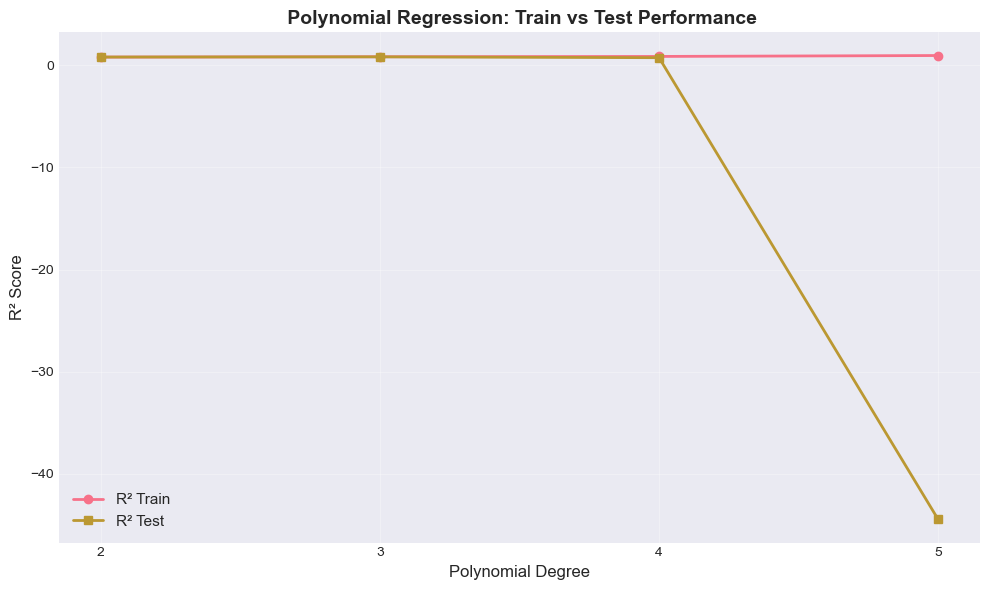

In [16]:

print("\n" + "=" * 60)
print("POLYNOMIAL REGRESSION ANALYSIS")
print("=" * 60)

degrees = range(2, 6)
poly_results = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    poly_results.append({'degree': d, 'r2_train': r2_train, 'r2_test': r2_test})
    print(f"Degree {d}: R² Train = {r2_train:.4f}, R² Test = {r2_test:.4f}")

poly_df = pd.DataFrame(poly_results)
plt.figure(figsize=(10, 6))
plt.plot(poly_df['degree'], poly_df['r2_train'], marker='o', label='R² Train', linewidth=2)
plt.plot(poly_df['degree'], poly_df['r2_test'], marker='s', label='R² Test', linewidth=2)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title(' Polynomial Regression: Train vs Test Performance', fontsize=14, fontweight='bold')
plt.xticks(degrees)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Polynomial (deg 3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
    'SVR (RBF)': SVR(kernel='rbf', C=100, gamma='scale')
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'R² Train': r2_train, 
        'R² Test': r2_test,
        'MSE Test': mse_test,
        'MAE Test': mae_test,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

print(f"\n{'Model':<25} {'R² Train':<10} {'R² Test':<10} {'MSE Test':<12} {'MAE Test':<12} {'CV Mean':<10}")
print("-" * 95)

for model_name, metrics in results.items():
    print(f"{model_name:<25} {metrics['R² Train']:<10.4f} {metrics['R² Test']:<10.4f} "
          f"{metrics['MSE Test']:<12.2f} {metrics['MAE Test']:<12.2f} {metrics['CV Mean']:<10.4f}")


MODEL COMPARISON

Model                     R² Train   R² Test    MSE Test     MAE Test     CV Mean   
-----------------------------------------------------------------------------------------------
Linear Regression         0.7409     0.7534     526.06       18.25        0.7398    
Ridge Regression          0.7406     0.7536     525.74       18.24        0.7396    
Lasso Regression          0.7306     0.7464     540.98       18.54        0.7297    
Polynomial (deg 3)        0.8133     0.8021     422.28       15.99        0.7892    
Decision Tree             0.8560     0.7055     628.34       18.89        0.6876    
Random Forest             0.9531     0.7941     439.36       16.08        0.7842    
SVR (RBF)                 0.8185     0.8075     410.79       15.65        0.7963    


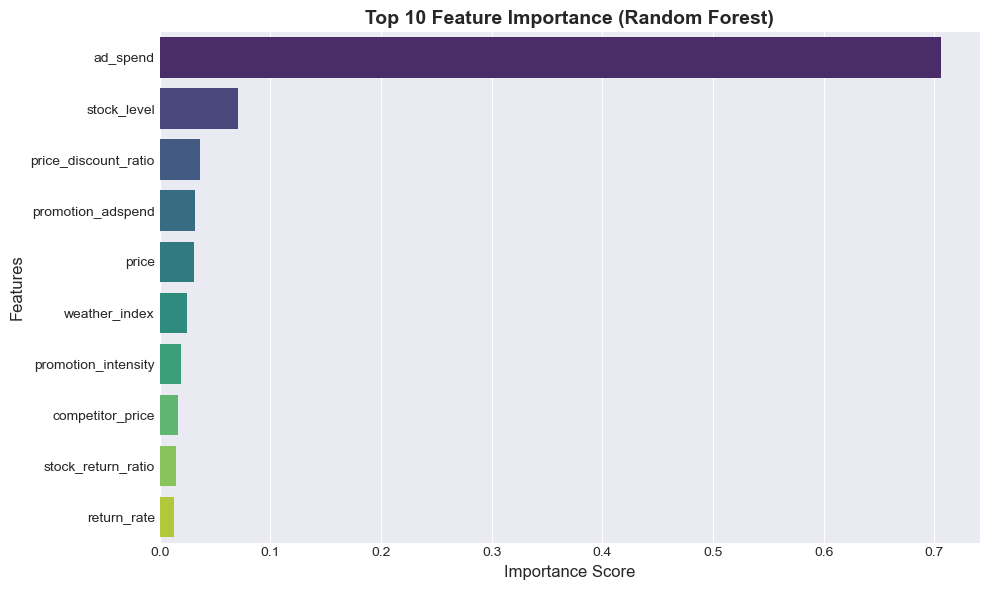


📊 Feature Importance:
                 feature  importance
3               ad_spend    0.705903
5            stock_level    0.070325
9   price_discount_ratio    0.036098
10     promotion_adspend    0.031438
0                  price    0.031266
6          weather_index    0.024305
2    promotion_intensity    0.019054
4       competitor_price    0.016814
11    stock_return_ratio    0.014542
8            return_rate    0.012949


In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("\n📊 Feature Importance:")
print(feature_importance.head(10))

##  8. Model Visualization

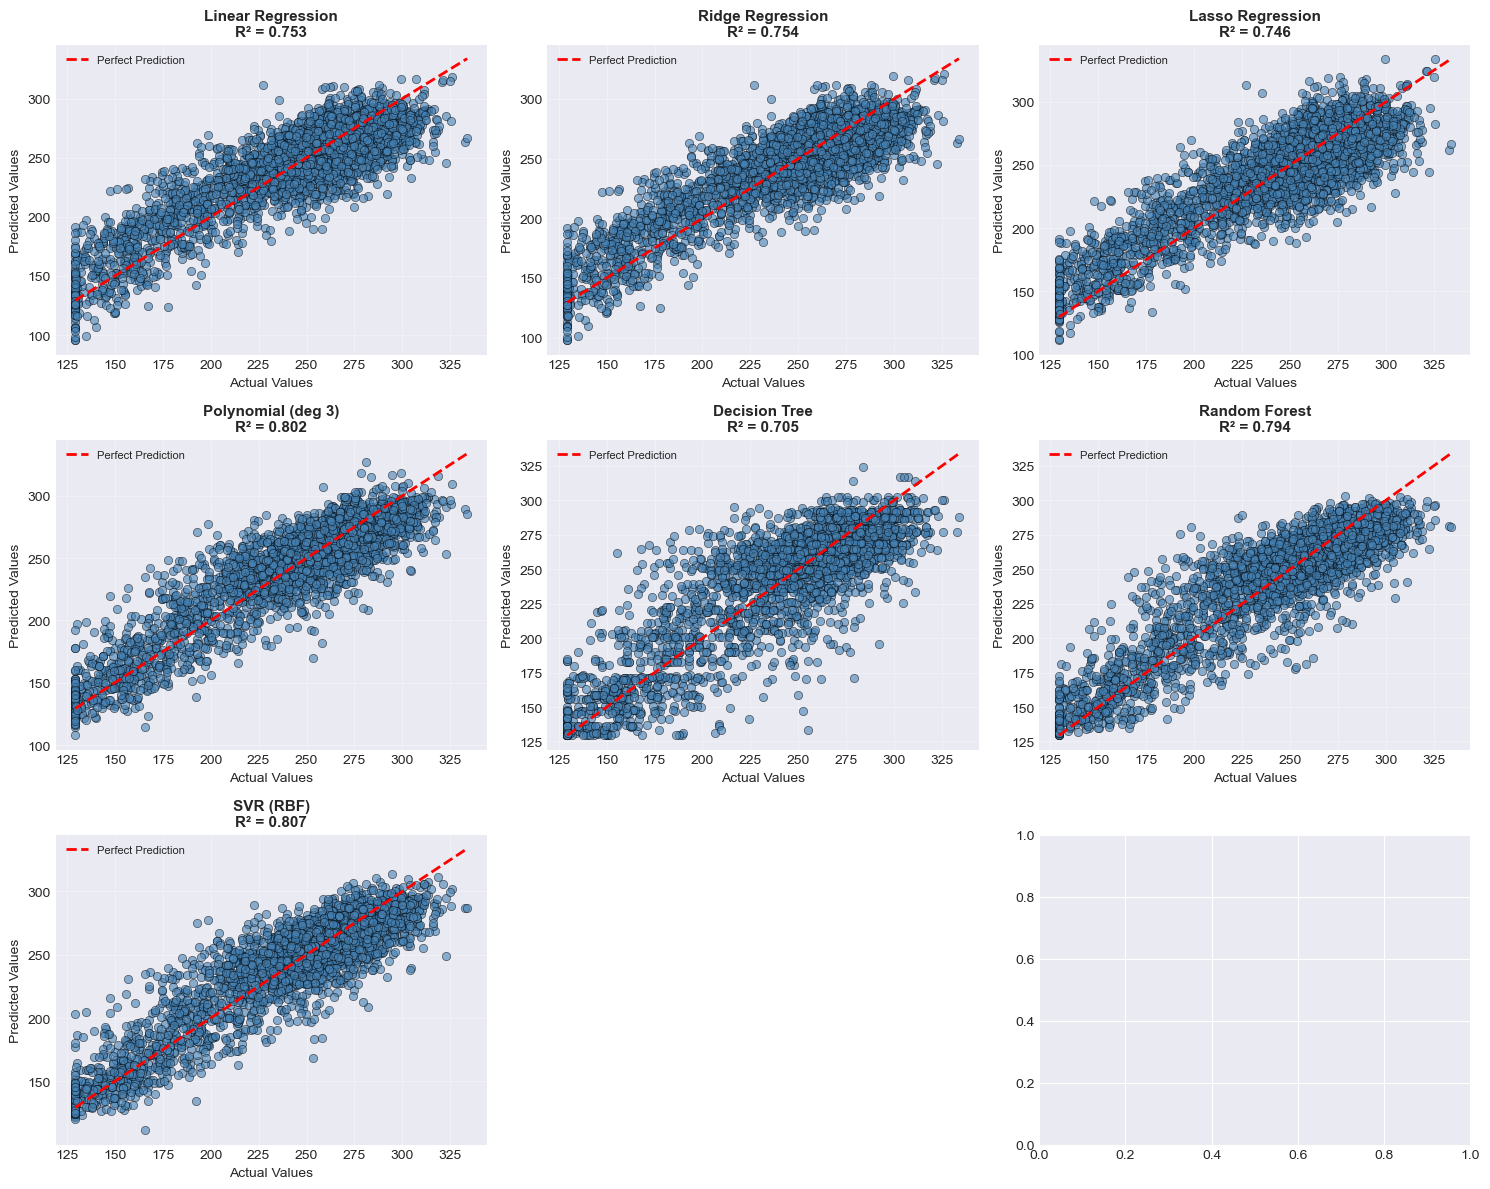

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    
    axes[idx].scatter(y_test, y_pred, alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                   'r--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].set_title(f'{name}\nR² = {results[name]["R² Test"]:.3f}', 
                        fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

axes[-2].axis('off')

plt.tight_layout()
plt.show()

In [51]:
best_model_name = max(results, key=lambda x: results[x]['R² Train'])
best_model = models[best_model_name]

print(f"\n Best Model: {best_model_name}")
print(f"   R² Test Score: {results[best_model_name]['R² Test']:.4f}")
print(f"   R² Train Score: {results[best_model_name]['R² Train']:.4f}")


 Best Model: Random Forest
   R² Test Score: 0.7941
   R² Train Score: 0.9531


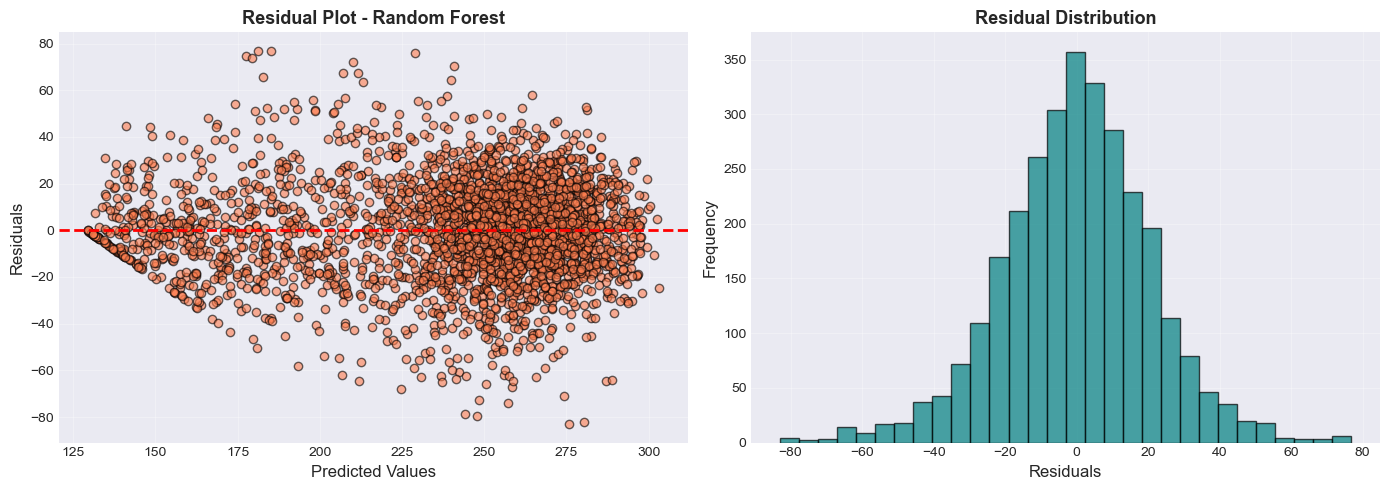

In [52]:

y_pred_best = best_model.predict(X_test_scaled)
residuals = y_test - y_pred_best

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_pred_best, residuals, alpha=0.6, color='coral', edgecolors='black')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title(f'Residual Plot - {best_model_name}', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(residuals, bins=30, color='teal', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Residual Distribution', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##  9. Make Predictions on New Data

In [54]:
import numpy as np

new_data = np.array([[
    98.24,                          
    49.33,                          
    6.57,                           
    4.96,                           
    2536.42,                        
    50.33,                          
    0.52,                           
    6.76,                           
    1219.36,                        
    49.33 * 2536.42,             
    6.57 * 4.96,                    
    50.33 / (1219.36 + 1),          
    49.33 ** 2,                     
    6.76 ** 2                      
]])

new_data_scaled = scaler.transform(new_data)
prediction = best_model.predict(new_data_scaled)

print(f" Predicted Footfall: {prediction[0]:.2f} customers")

 Predicted Footfall: 150.22 customers


## 10. Save Best Model

In [55]:
import joblib

joblib.dump(best_model, 'best_model_footfall_predictor.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\n Model and scaler saved successfully!")
print("   - best_model_footfall_predictor.pkl")
print("   - scaler.pkl")


 Model and scaler saved successfully!
   - best_model_footfall_predictor.pkl
   - scaler.pkl


##  11. Conclusion & Insights

In [57]:
print("\n" + "=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)

print(f"\n Best Model: {best_model_name}")
print(f" R² Score Test: {results[best_model_name]['R² Test']:.4f}")
print(f" R² Score Train: {results[best_model_name]['R² Train']:.4f}")
print(f" Mean Absolute Error: {results[best_model_name]['MAE Test']:.2f}")
print(f" Cross-Validation Score: {results[best_model_name]['CV Mean']:.4f} (±{results[best_model_name]['CV Std']:.4f})")

print("\n Key Findings:")
print("   1. Feature importance analysis reveals the most influential factors")
print("   2. Model comparison shows trade-offs between complexity and performance")
print("   3. Residual analysis indicates model assumptions and potential improvements")

print("\n Recommendations:")
print("   1. Consider ensemble methods for better predictions")
print("   2. Collect more data for improved model generalization")
print("   3. Monitor model performance over time and retrain as needed")


PROJECT SUMMARY

 Best Model: Random Forest
 R² Score Test: 0.7941
 R² Score Train: 0.9531
 Mean Absolute Error: 16.08
 Cross-Validation Score: 0.7842 (±0.0104)

 Key Findings:
   1. Feature importance analysis reveals the most influential factors
   2. Model comparison shows trade-offs between complexity and performance
   3. Residual analysis indicates model assumptions and potential improvements

 Recommendations:
   1. Consider ensemble methods for better predictions
   2. Collect more data for improved model generalization
   3. Monitor model performance over time and retrain as needed
